In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
def show(img):#display image
    plt.imshow(img, cmap="gray")
    plt.show()

24 780 3


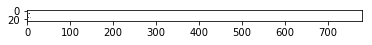

In [3]:
img = cv2.imread('935574-answer.png')
height, width, channels = img.shape
print height, width, channels
show(img)

As we can see, the original image has huge width, and low height, wchich cannot be recognized by tesseract.
So we need to do some image quality enhancement to get more clear image.

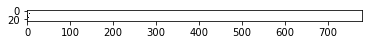

In [10]:
img = cv2.imread('935574-answer.png')

# threshold and erode
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY) 
#kernel = np.ones((3,3),np.uint8)
#img = cv2.erode(thresh,kernel,iterations = 1)
img = thresh
show(img)

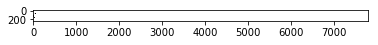

In [11]:
# zoom the image
k = 10
height, width = img.shape[:2]
res = cv2.resize(img,(k*width, k*height), interpolation = cv2.INTER_CUBIC)
show(res)

240 7800 3


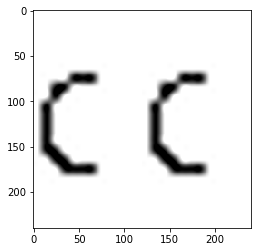

In [12]:
height, width, channels = res.shape
print height, width, channels
# add two image to one image
vis = np.concatenate((res[:,:120], res[:,:120]), axis=1)# add 2 image horizon

show(vis)

In [13]:
cv2.imwrite('xxx.png', vis)#save as png

True

# Why concatenate/add two image ?

* tesseract not good at one character recognition
* tesseract good at multi-character(text) recognition
* so add two characters together for recognition

# How to OCR by tesseract?

* https://github.com/ybdesire/machinelearning/tree/master/32_OCR/tesseract/basic_usage#simple-ocr